In [56]:
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [14]:
res = npf.fv(rate=0.08, nper=5, pmt=0, pv=-1000)
print(round(res,2))

1469.33


In [15]:
print(npf.fv(rate=0, nper=3, pmt=0, pv=-100))

100.0


C:\Users\ivana\anaconda3\lib\site-packages\numpy_financial\_financial.py:130: RuntimeWarning: invalid value encountered in long_scalars
  (1 + rate*when)*(temp - 1)/rate)


In [16]:
import requests

url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(url_link, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

df = pd.read_html(r.text)
df[0]

,Name,Title,Pay,Exercised,Year Born
0,Mr. Elon R. Musk,"Technoking of Tesla, CEO & Director",NaN,NaN,1972.0
1,Mr. Zachary J. Kirkhorn,Master of Coin & CFO,300.76k,4.19M,1985.0
2,Mr. Andrew D. Baglino,Sr. VP of Powertrain & Energy Engineering,283.27k,14.86M,1981.0
3,Mr. Vaibhav Taneja,Corp. Controller & Chief Accounting Officer,NaN,NaN,1978.0
4,Mr. Martin Viecha,Sr. Director for Investor Relations,NaN,NaN,NaN
5,Mr. Alan Prescott,VP of Legal,NaN,NaN,NaN
6,Mr. Dave Arnold,Sr. Director of Global Communications,NaN,NaN,NaN
7,Brian Scelfo,Sr. Director of Corp. Devel.,NaN,NaN,NaN
8,Mr. Jeffrey B. Straubel,Sr. Advisor,NaN,NaN,1976.0
9,Mr. Franz von Holzhausen,Chief Designer,NaN,NaN,NaN


In [17]:
url_link_2 = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link_2, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data_2 = pd.read_html(r.text)
data_2 = data_2[0]
data_2

,Earnings Estimate,Current Qtr. (Dec 2021),Next Qtr. (Mar 2022),Current Year (2021),Next Year (2022)
0,No. of Analysts,23.00,13.00,32.00,31.00
1,Avg. Estimate,2.09,1.99,6.26,8.76
2,Low Estimate,1.39,1.40,4.30,5.94
3,High Estimate,2.98,2.62,7.22,12.29
4,Year Ago EPS,0.80,0.93,2.24,6.26


In [18]:
data_2[data_2['Earnings Estimate']=='Avg. Estimate']

,Earnings Estimate,Current Qtr. (Dec 2021),Next Qtr. (Mar 2022),Current Year (2021),Next Year (2022)
1,Avg. Estimate,2.09,1.99,6.26,8.76


In [19]:
data_2.iloc[1:2]

,Earnings Estimate,Current Qtr. (Dec 2021),Next Qtr. (Mar 2022),Current Year (2021),Next Year (2022)
1,Avg. Estimate,2.09,1.99,6.26,8.76


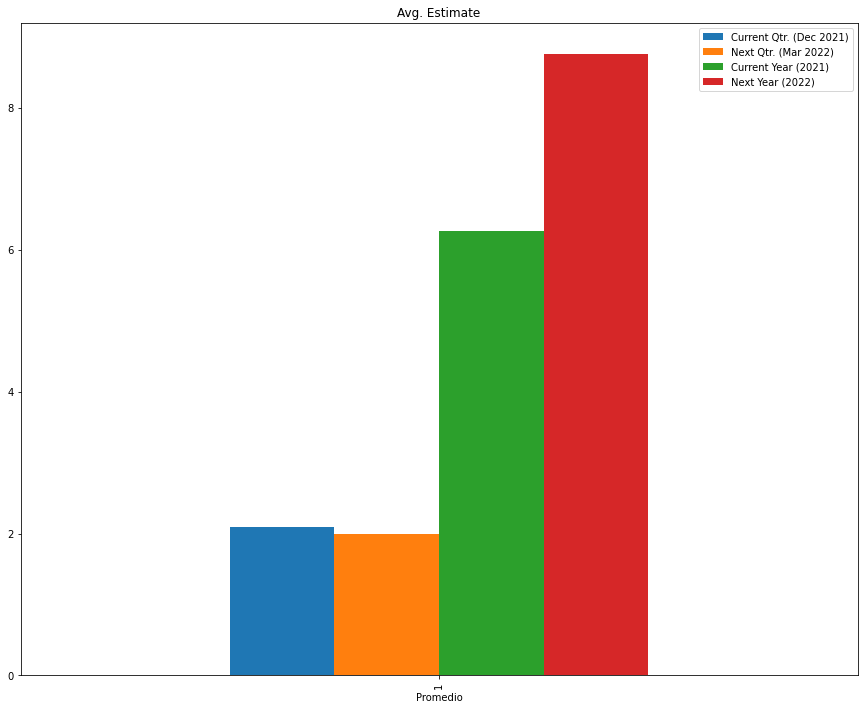

In [20]:
data_2.iloc[1:2].plot(kind='bar', figsize=(15,12))
plt.title('Avg. Estimate')
plt.xlabel('Promedio')
plt.show()

In [21]:
import yfinance as yf

In [22]:
data = yf.Ticker('TSLA')

In [23]:
print(data.info['profitMargins'])

0.07403


In [24]:
x = data.earnings
px.line(x)

In [25]:
print(data.major_holders)

        0                                      1
0  19.96%        % of Shares Held by All Insider
1  42.45%       % of Shares Held by Institutions
2  53.03%        % of Float Held by Institutions
3    2839  Number of Institutions Holding Shares


In [26]:
data.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",61992012,2021-09-29,0.0617,48073565465
1,Blackrock Inc.,52829488,2021-09-29,0.0526,40968211354
2,Capital World Investors,37427314,2021-09-29,0.0373,29024133460
3,State Street Corporation,31230141,2021-09-29,0.0311,24218349742
4,Baillie Gifford and Company,13853124,2021-09-29,0.0138,10742820599
5,"Geode Capital Management, LLC",13169939,2021-09-29,0.0131,10213024295
6,Jennison Associates LLC,10630339,2021-09-29,0.0106,8243615287
7,"FMR, LLC",9921292,2021-09-29,0.0099,7693763520
8,Northern Trust Corporation,8634516,2021-09-29,0.0086,6695894467
9,Norges Bank Investment Management,7790070,2020-12-30,0.0078,5497218696


In [27]:
data.info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 70757,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and 

In [28]:
data.cashflow

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Change To Liabilities,2.423000e+09,1.447000e+09,2.203000e+09,8.570000e+08
Total Cashflows From Investing Activities,-3.132000e+09,-1.436000e+09,-2.337000e+09,-4.196000e+09
Net Borrowings,-2.488000e+09,7.980000e+08,8.900000e+07,3.385000e+09
Total Cash From Financing Activities,9.973000e+09,1.529000e+09,5.740000e+08,4.415000e+09
Change To Operating Activities,-1.165000e+09,-1.000000e+09,-6.250000e+08,-1.150000e+09
Issuance Of Stock,1.268600e+10,1.111000e+09,2.960000e+08,6.590000e+08
Net Income,7.210000e+08,-8.620000e+08,-9.760000e+08,-1.962000e+09
Change In Cash,1.311800e+10,2.506000e+09,3.120000e+08,1.980000e+08
Effect Of Exchange Rate,3.340000e+08,8.000000e+06,-2.300000e+07,4.000000e+07
Total Cash From Operating Activities,5.943000e+09,2.405000e+09,2.098000e+09,-6.100000e+07


In [29]:
data_cencosud = yf.Ticker('CENCOSUD.SN')

In [30]:
data_cencosud.cashflow

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Change To Liabilities,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total Cashflows From Investing Activities,-3.514789e+11,5.706851e+11,-2.574715e+11,-1.008979e+11
Net Borrowings,-9.140228e+11,-5.109452e+11,9.126356e+10,7.829537e+10
Total Cash From Financing Activities,-1.161169e+12,-6.074145e+11,-2.155145e+11,-3.081732e+11
Net Income,2.293061e+10,1.141096e+11,1.912852e+11,4.399887e+11
Change In Cash,-3.856316e+11,7.467396e+11,6.683716e+10,-2.123168e+10
Effect Of Exchange Rate,-2.025969e+10,1.922419e+10,-1.825501e+09,-2.546029e+10
Total Cash From Operating Activities,1.147276e+12,7.642448e+11,5.416487e+11,4.132997e+11
Depreciation,3.427662e+11,2.855472e+11,1.773089e+11,2.099207e+11
Other Cashflows From Investing Activities,-2.944102e+11,6.534630e+11,-6.290608e+10,1.039733e+11


<AxesSubplot:xlabel='Year'>

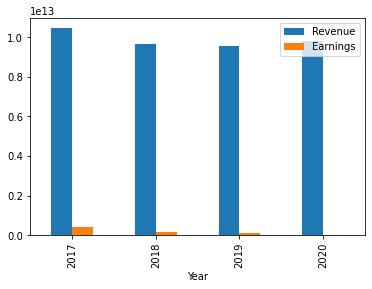

In [31]:
data_cencosud.earnings.plot(kind='bar')

In [32]:
x = data_cencosud.institutional_holders

In [33]:
data_cencosud.major_holders

,0,1
0,52.41%,% of Shares Held by All Insider
1,36.81%,% of Shares Held by Institutions
2,77.35%,% of Float Held by Institutions
3,161,Number of Institutions Holding Shares


In [34]:
x[x['Shares']>10000000]

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard International Stock Index-Emerging Ma...,19001995,2021-10-30,0.0066,22612374050
1,Vanguard International Stock Index-Total Intl ...,18146497,2021-10-30,0.0063,21594331430
2,iShares Core MSCI Emerging Markets ETF,12358010,2021-10-30,0.0043,14706031900
3,iShares MSCI Chile ETF,10926804,2021-10-30,0.0038,13002896760


In [35]:
x = data.recommendations
x = x[x.index > '2021-06-01']
print(x)

                                    Firm        To Grade From Grade Action
Date                                                                      
2021-06-14 13:55:22    Canaccord Genuity             Buy              main
2021-06-29 11:29:11                  UBS         Neutral              main
2021-07-07 14:52:52            JP Morgan     Underweight              main
2021-07-27 10:54:46               Mizuho             Buy              main
2021-07-27 11:48:23          Wells Fargo    Equal-Weight              main
2021-07-27 11:51:22          RBC Capital  Sector Perform              main
2021-07-27 13:38:59        Goldman Sachs             Buy              main
2021-07-27 14:27:49    Canaccord Genuity             Buy              main
2021-07-29 10:14:50              DZ Bank             Buy       Sell     up
2021-08-02 15:55:02       KGI Securities      Outperform              init
2021-08-09 09:17:02            Jefferies             Buy       Hold     up
2021-09-23 12:18:35      

# create a function that will take a ticker as its parameter, and output the ROE value for that ticker.

In [36]:
def ROE(ticker):
    data = yf.Ticker(ticker)
    roe = data.info['returnOnEquity']
    name = data.info['shortName']
    print(name, ':', roe)

In [37]:
ROE('AAPL')
ROE('TSLA')
ROE('CENCOSUD.SN')

Apple Inc. : 1.47443
Tesla, Inc. : 0.15641
CENCOSUD SA : 0.11033


In [38]:
print(data.history(period='6mo'))
# Valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max. 

                   Open         High          Low        Close    Volume  \
Date                                                                       
2021-07-08   628.369995   654.429993   620.460022   652.809998  22773300   
2021-07-09   653.179993   658.909973   644.690002   656.950012  18140500   
2021-07-12   662.200012   687.239990   662.159973   685.700012  25927000   
2021-07-13   686.320007   693.280029   666.299988   668.539978  20966100   
2021-07-14   670.750000   678.609985   652.840027   653.380005  21641200   
...                 ...          ...          ...          ...       ...   
2022-01-03  1147.750000  1201.069946  1136.040039  1199.780029  34643800   
2022-01-04  1189.550049  1208.000000  1123.050049  1149.589966  33416100   
2022-01-05  1146.650024  1170.339966  1081.010010  1088.119995  26706600   
2022-01-06  1077.000000  1088.000000  1020.500000  1064.699951  30112200   
2022-01-07  1080.369995  1080.930054  1010.000000  1026.959961  27919000   

           

In [39]:
data.history(start='2021-01-01', end='2021-03-31')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,0,0
2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,0,0
2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,0,0
2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,0,0
2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,0,0
2021-01-11,849.400024,854.429993,803.619995,811.190002,59301600,0,0
2021-01-12,831.000000,868.000000,827.340027,849.440002,46270700,0,0
2021-01-13,852.760010,860.469971,832.000000,854.409973,33312500,0,0
2021-01-14,843.390015,863.000000,838.750000,845.000000,31266300,0,0


In [40]:
import plotly.graph_objects as go

In [41]:
stocks_price = data_cencosud.history(start='2021-01-01', end='2021-03-31')

In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stocks_price.index, y=stocks_price['Close'], name='Close Price'))
fig.add_trace(go.Scatter(x=stocks_price.index, y=stocks_price['High'], name='Higher Price'))

fig.update_layout(
    title_text='Stock Prices January - March 2021 CECONSUD'
)

# Stock return

In [43]:
tesla = yf.Ticker('TSLA')

In [44]:
price = tesla.history(period='1y')

In [45]:
x = price['Close'].pct_change()
print(x)

Date
2021-01-08         NaN
2021-01-11   -0.078214
2021-01-12    0.047153
2021-01-13    0.005851
2021-01-14   -0.011013
                ...   
2022-01-03    0.135317
2022-01-04   -0.041833
2022-01-05   -0.053471
2022-01-06   -0.021523
2022-01-07   -0.035447
Name: Close, Length: 253, dtype: float64


In [46]:
px.line(x)

In [47]:
returns = (x+1).cumprod()

In [48]:
px.histogram(returns)

# Analyzing a Portfolio

In [49]:
stocks = ['AAPL','AMZN','MSFT','TSLA']
weights = [0.3,0.2,0.4,0.1]

In [50]:
data = yf.download(stocks, start='2021-01-01')

[*********************100%***********************]  4 of 4 completed


In [51]:
# daily return
x = data['Close'].pct_change()

In [52]:
# portfolio return
ret = (x*weights).sum(axis=1)

In [53]:
# total cumulative return
cumulative = (ret + 1).cumprod()

In [54]:
px.line(cumulative)

In [57]:
print(np.std(ret))

0.013458015517538651


In [58]:
annual_std = np.std(ret) * np.sqrt(252)
print(annual_std)

0.21363937319913295


# Portfolio Optimization

In [59]:
data = yf.download(stocks, start='2018-01-01')

[*********************100%***********************]  4 of 4 completed


In [60]:
data = data['Close']
x = data.pct_change()

In [61]:
# We are going to randomly assign a weight to each stock in our portfolio,
# and then calculate the metrics for that portfolio, including the Sharpe ratio. 

wts = np.random.uniform(size =len(x.columns))
wts = wts/np.sum(wts)

print(wts)

[0.17293001 0.26290759 0.15048476 0.41367764]


In [62]:
p_weights=[]
p_returns=[]
p_risk=[]
p_sharpe=[]

In [63]:
count = 500
for k in range(0,count):
    wts = np.random.uniform(size=len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean()*wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x*wts).sum(axis=1)
    annual_std = np.std(ret)*np.sqrt(252)
    p_risk.append(annual_std)

    #sharpe ratio
    sharpe = (np.mean(ret)/np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


In [64]:
max_ind = np.argmax(p_sharpe)
print(p_sharpe[max_ind])
print(p_weights[max_ind])

1.576010379342292
[0.33582041 0.01354998 0.32218466 0.32844495]


In [65]:
grafico_max = pd.Series(p_weights[max_ind], index=x.columns)
px.bar(grafico_max)

In [66]:
data_nueva = pd.DataFrame(
    {
        'risk':p_risk,
        'return':p_returns
    }
)

In [67]:
data_nueva.head()

,risk,return
0,0.283126,0.379226
1,0.352368,0.549191
2,0.294787,0.434173
3,0.334308,0.521212
4,0.291086,0.393050


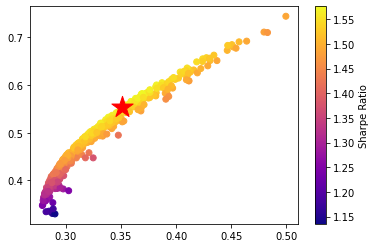

In [68]:
# The chart is called Efficient Frontier and shows the 
# returns on the Y-axis and volatility on the X-axis.
max_ind = np.argmax(p_sharpe)

plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()

In [69]:
px.scatter(data_nueva, x='risk', y='return', color=p_sharpe)